Name: Eric Wu

# Homework 3a

<b>Due by next class to be submitted on Blackboard

1.  Use the image of you choosing, show you image as a grayscale: 7 bit, 5 bit and 3 bit.

2.  Write a script that loads a GIF image and counts the unique color levels therein.

3.  Create a histogram of the intensities of the pixels in your image.</b>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import numpy as np

'import cv2\nimport colorsys\nfrom skimage import color'

<ipython-input-3-16720a5f612d>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mgdata = imageio.imread(url, mode='F').astype(np.uint8)


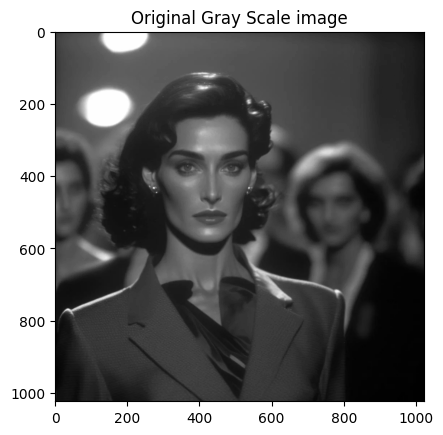

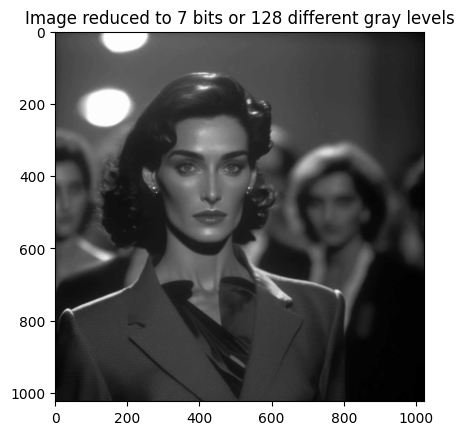

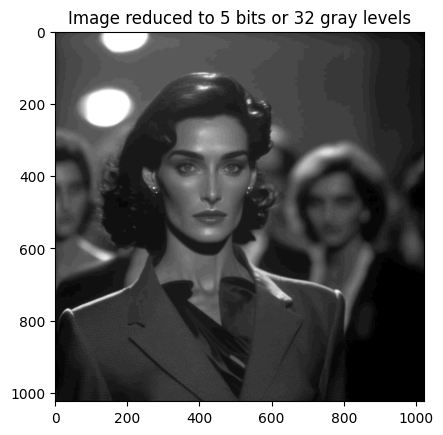

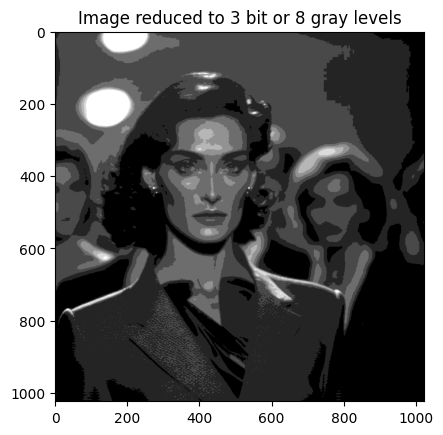

In [3]:
#Use the image of you choosing, show you image as a grayscale: 7 bit, 5 bit and 3 bit.

url = "https://raw.githubusercontent.com/ewu22gmu/Test_Photo1_CDS468/main/yasmeen-ghauri-for-yves-saint-laurent-v0-4s2ytbvcae3a1.jpg.webp"
mgdata = imageio.imread(url, mode='F').astype(np.uint8)

#  10101010 - image pixel
#  11111100 - select my grayscale levels
#  10101000

c1 = mgdata & 0xFE  #  7 bit or 128 gray levels
c2 = mgdata & 0xF8  #  5 bit or 32 gray levels
c3 = mgdata & 0xE0  #  3 bit or 8 gray levels

plt.title('Original Gray Scale image')
plt.imshow(mgdata, cmap='gray')
plt.show()

plt.title('Image reduced to 7 bits or 128 different gray levels')
plt.imshow(c1, cmap='gray')
plt.show()

plt.title('Image reduced to 5 bits or 32 gray levels')
plt.imshow(c2, cmap='gray')
plt.show()

plt.title('Image reduced to 3 bit or 8 gray levels')
plt.imshow(c3, cmap='gray')
plt.show()

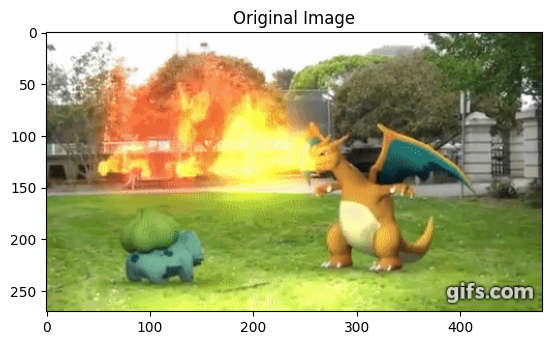

There are 255 unique colors


In [4]:
#Write a script that loads a GIF image and counts the unique color levels therein.

from PIL import Image
import urllib

url = "https://raw.githubusercontent.com/ewu22gmu/Test_Photo1_CDS468/main/frame42.gif"
mg = Image.open(urllib.request.urlopen(url))

plt.title('Original Image')
plt.imshow(mg)
plt.show()

mg = mg.getdata()
unique_colors = len(set(mg))

print(f"There are {unique_colors} unique colors")

In [5]:
im = np.array(mg)
print(f"There are {len(set(im))} unique colors")

There are 255 unique colors


129600


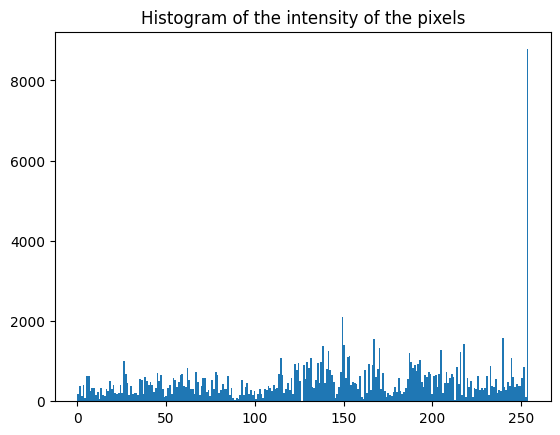

In [6]:
#Create a histogram of the intensities of the pixels in your image.

im = np.array(mg)
print(len(im))
plt.hist(im, bins = 256)
plt.title('Histogram of the intensity of the pixels')
plt.show()

# Homework 3b

<br>

<b>For these problems use a color image that has regions with brilliant reds, greens, and blues. In the following problems this is called the test image.<br><br>

1. Split the test image into its three R, G, B components and display each component as a gray scale image.<br><br>

2. Load the test image, exchange the RGB components such that the green information is now in the red channel, the blue information is now in the green channel and the red information is now in the blue channel.  Display this color image. <br><br>

3.  Save the image created in #2 to a file.<br><br>

4. Convert the test image to the HSV components and display each channel as a gray scale image.<br><br>

5. Convert the test image to YIQ and display each channel as a gray scale image.</b>


<ipython-input-47-d95b7edf4aa3>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  test_image = imageio.imread(url)


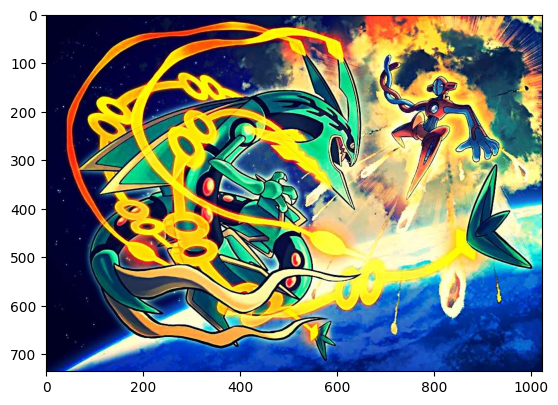

In [47]:
url = "https://raw.githubusercontent.com/ewu22gmu/Test_Photo1_CDS468/main/Deoxys_Rayquaza.jpg"
test_image = imageio.imread(url)

plt.imshow(test_image)
plt.show()

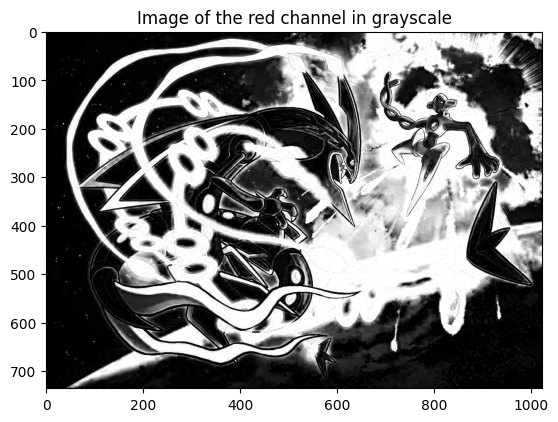

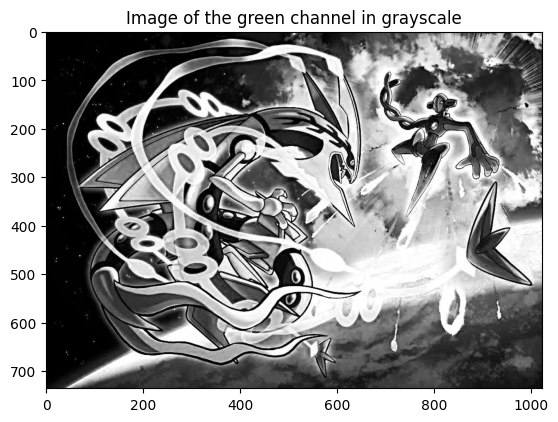

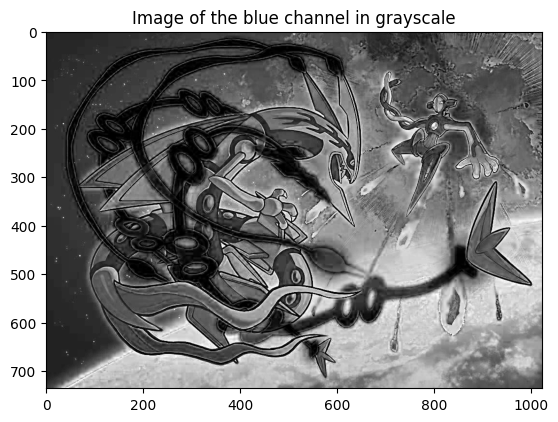

In [79]:
#Split the test image into its three R, G, B components and display each component as a gray scale image.

#R,G,B = np.split(test_image,3,axis=2)
R,G,B = cv2.split(test_image)

plt.imshow(R, cmap='gray')
plt.title('Image of the red channel in grayscale')
plt.show()

plt.imshow(G, cmap='gray')
plt.title('Image of the green channel in grayscale')
plt.show()

plt.imshow(B, cmap='gray')
plt.title('Image of the blue channel in grayscale')
plt.show()

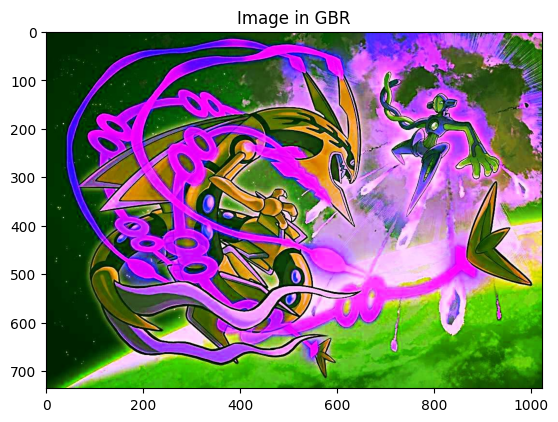

In [80]:
#Load the test image, exchange the RGB components such that the green information is now in the red channel, the blue information is now in the green channel and the red information is now in the blue channel. Display this color image.
'''gbr = np.concatenate((g,b,r), axis=2)

plt.imshow(gbr)
plt.title('Image in GBR')
plt.show()'''

PIL_test_mg = Image.fromarray(test_image)

r,g,b = PIL_test_mg.split()

gbr_mg = Image.merge('RGB', (g,b,r))
plt.imshow(gbr_mg)
plt.title('Image in GBR')
plt.show()

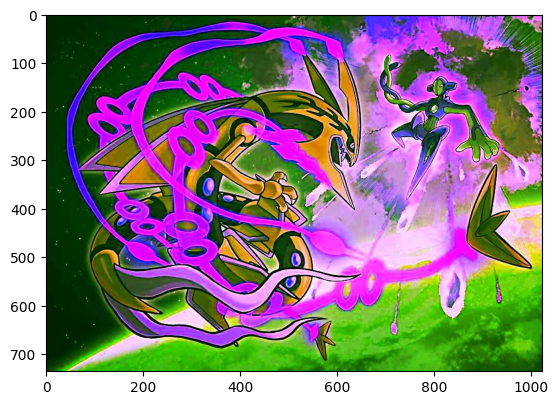

In [81]:
#Save the image created in #2 to a file.
plt.imshow(gbr)
plt.savefig('gbr.png')

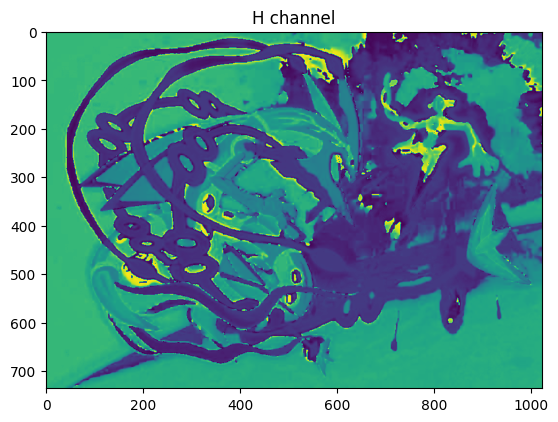

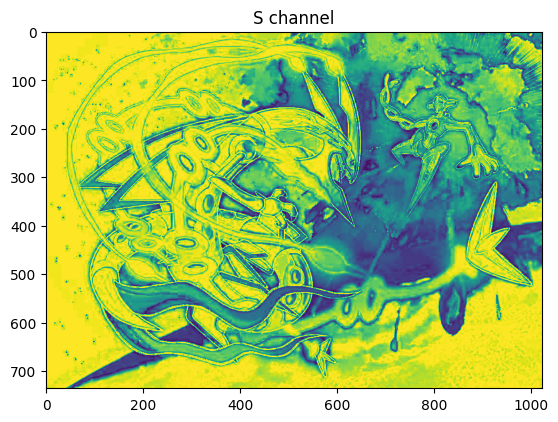

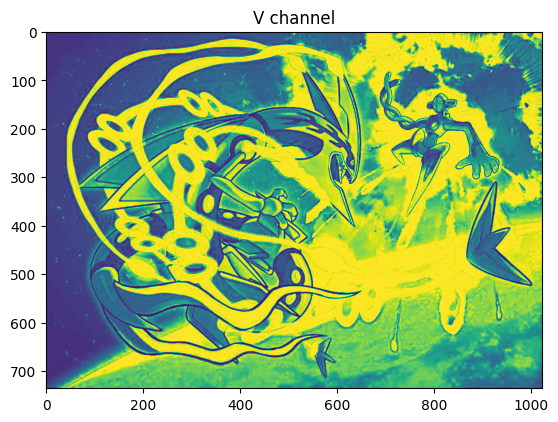

In [82]:
#Convert the test image to the HSV components and display each channel as a gray scale image.

import cv2
import colorsys
from skimage import color

adata = color.rgb2hsv(test_image)
HSV = cv2.split(adata)

'''HSV = test_image.convert('HSV').split()'''
HSV_title = ['H channel', 'S channel','V channel']


for i in range(3):
  plt.imshow(HSV[i])
  plt.title(HSV_title[i])
  plt.show()

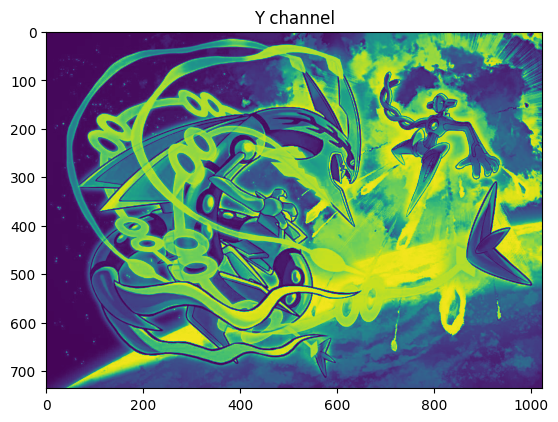

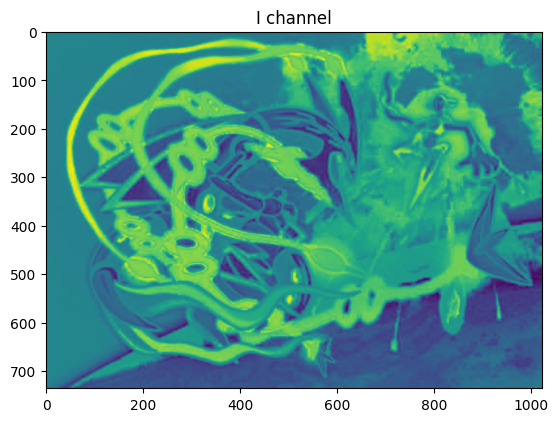

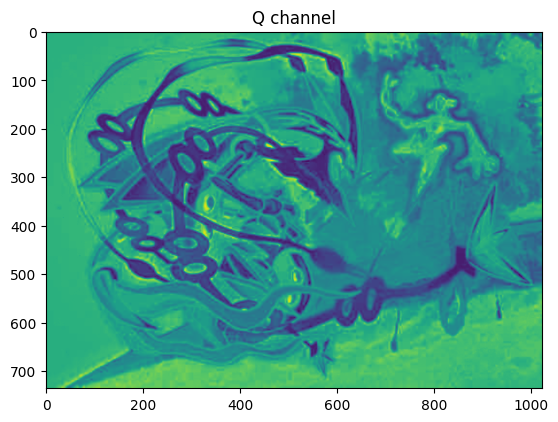

In [84]:
#Convert the test image to YIQ and display each channel as a gray scale image.
YIQ = colorsys.rgb_to_yiq(R,G,B)
YIQ_title = ['Y channel', 'I channel','Q channel']

for i in range(3):
  plt.imshow(YIQ[i])
  plt.title(YIQ_title[i])
  plt.show()